<a href="https://colab.research.google.com/github/sheshank1436/machine-learning/blob/master/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [97]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample (2).csv


In [98]:
import io
email = pd.read_csv(io.BytesIO(uploaded['sample.csv']), encoding='ISO-8859-1')
email.shape

(3224, 3)

In [99]:
email.head()

,id,reviews.text,reviews.rating
0,AVpgNzjwLJeJML43Kpxn,I order 3 of them and one of the item is bad q...,3
1,AVpgNzjwLJeJML43Kpxn,Bulk is always the less expensive way to go fo...,4
2,AVpgNzjwLJeJML43Kpxn,Well they are not Duracell but for the price i...,5
3,AVpgNzjwLJeJML43Kpxn,Seem to work as well as name brand batteries a...,5
4,AVpgNzjwLJeJML43Kpxn,These batteries are very long lasting the pric...,5


In [100]:
combine_df=email[['reviews.rating' , 'reviews.text']]
combine_df.head()

,reviews.rating,reviews.text
0,3,I order 3 of them and one of the item is bad q...
1,4,Bulk is always the less expensive way to go fo...
2,5,Well they are not Duracell but for the price i...
3,5,Seem to work as well as name brand batteries a...
4,5,These batteries are very long lasting the pric...


In [101]:
hs=combine_df[combine_df['reviews.rating']==5]
s=combine_df[combine_df['reviews.rating']==4]
n=combine_df[combine_df['reviews.rating']==3]
ls=combine_df[combine_df['reviews.rating']==2]
ns=combine_df[combine_df['reviews.rating']==1]
print(hs.shape,s.shape,n.shape,ls.shape,ns.shape)

(687, 2) (666, 2) (625, 2) (616, 2) (630, 2)


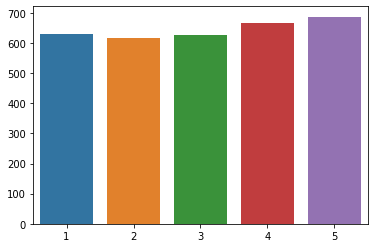

In [102]:
import seaborn as sns
rat_hist = email.groupby('reviews.rating',as_index=False).count()
sns.barplot(x=rat_hist['reviews.rating'].values,y=rat_hist['id'].values)

In [75]:
combine_df['reviews.text'] = combine_df['reviews.text'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
combine_df.head(10)

,reviews.rating,reviews.text
0,3,I order of them and one of the item is bad q...
1,4,Bulk is always the less expensive way to go fo...
2,5,Well they are not Duracell but for the price i...
3,5,Seem to work as well as name brand batteries a...
4,5,These batteries are very long lasting the pric...
5,5,Bought a lot of batteries for Christmas and th...
6,5,ive not had any problame with these batteries ...
7,5,Well if you are looking for cheap non recharge...
8,3,These do not hold the amount of high power jui...
9,4,AmazonBasics AA AAA batteries have done well b...


In [76]:
combine_df['reviews.text'] = combine_df['reviews.text'].apply(lambda x: x.lower())
combine_df.head(10)

,reviews.rating,reviews.text
0,3,i order of them and one of the item is bad q...
1,4,bulk is always the less expensive way to go fo...
2,5,well they are not duracell but for the price i...
3,5,seem to work as well as name brand batteries a...
4,5,these batteries are very long lasting the pric...
5,5,bought a lot of batteries for christmas and th...
6,5,ive not had any problame with these batteries ...
7,5,well if you are looking for cheap non recharge...
8,3,these do not hold the amount of high power jui...
9,4,amazonbasics aa aaa batteries have done well b...


In [0]:
import spacy
from spacy import displacy

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
import string

from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
punct = string.punctuation

punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [0]:
from sklearn.ensemble import RandomForestClassifier
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = RandomForestClassifier()

In [0]:
X = combine_df['reviews.text']
y = combine_df['reviews.rating']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [86]:
clf.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [0]:
y_pred = clf.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.81      0.77       140
           2       0.67      0.68      0.67       132
           3       0.81      0.71      0.75       129
           4       0.44      0.39      0.41       122
           5       0.52      0.56      0.54       122

    accuracy                           0.64       645
   macro avg       0.63      0.63      0.63       645
weighted avg       0.64      0.64      0.63       645



In [89]:
confusion_matrix(y_test, y_pred)

array([[113,  23,   3,   0,   1],
       [ 30,  90,   5,   4,   3],
       [  5,  12,  91,  15,   6],
       [  2,   9,   9,  48,  54],
       [  5,   1,   5,  43,  68]])

In [107]:
clf.predict(['This item worked great, but it broke after 6 months of use.'])

array([5])

In [110]:
x='Basically the service was very bad.'
clf.predict([x])

array([1])

In [103]:
clf.predict(['Item Does Not Match Picture.'])

array([1])

In [104]:
clf.predict(['The only thing that disappoint me is the infra red port (irda).'])

array([2])

In [105]:
clf.predict([':-)Oh, the charger seems to work fine..'])

array([3])

In [109]:
clf.predict(['My previous experience with the company has been not so good. However, still I recommend using their products or services owing to their strong service network '])

array([4])

In [115]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [116]:
!pip install pypwin32


ERROR: Could not find a version that satisfies the requirement pypwin32 (from versions: none)
ERROR: No matching distribution found for pypwin32


In [111]:
import win32com.client

ModuleNotFoundError: ignored